
## <h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

### <h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('/content/shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [177]:
# Посмотрим на информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [178]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [179]:
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


Видим, что нет пропусков, все типы данных верные и нет выбросов.

In [180]:
# Посмотрим на категории покупок
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [181]:
# Посмотрим на частоту покупок
df['Frequency of Purchases'].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


**Гипотеза 1 - Нет взаимосвязи между возрастом и типом оплаты.**

Разобьем данные из столбца Age на 4 возрастных группы и проверим наличие корреляции с помощью теста хи-квадрат

In [182]:
from scipy.stats import chi2_contingency

# Разобьем данные на группы
bins = [18, 30, 45, 57, 70]
labels = ['18-30', '30-45', '45-57', '57-70']
df['group_of_age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Создадим таблицу сопряженности
cross_table = pd.crosstab(df['group_of_age'], df['Payment Method'])
print(f'Таблица сопряженности: {cross_table}')

# Проведем тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(cross_table)

# Результаты
print(f'Значение хи-квадрат: {chi2}')
print(f'Значение p-value: {p}')

# Установим уровень значимости
alpha = 0.05
if p < alpha:
    print('Зависимость между возрастом и типом оплаты статистически значима. Отвергаем гипотезу.')
else:
    print('Нет статистически значимой зависимости между возрастом и типом оплаты. Не отвергаем гипотезу.')


Таблица сопряженности: Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
group_of_age                                                               
18-30                     148   141          141         153     157    138
30-45                     173   181          212         182     164    180
45-57                     152   147          159         147     150    144
57-70                     148   162          174         145     156    179
Значение хи-квадрат: 11.308038894006518
Значение p-value: 0.7304680417491869
Нет статистически значимой зависимости между возрастом и типом оплаты. Не отвергаем гипотезу.


**Гипотеза 2 - Нет взаимосвязи между суммой покупок и статусом подписки**

Проверим с помощью t-теста

In [183]:
from scipy.stats import ttest_ind

# Разделим данные на группы по наличию подписки
subscribed = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
not_subscribed = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

# Проверим стат разницу у средних
t_stat, p_value = ttest_ind(subscribed, not_subscribed)

# Результаты
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Установим уровень значимости
alpha = 0.05
if p_value < alpha:
    print('Сумма покупок статистически значимо отличается для подписчиков и неподписчиков. Отвергаем гипотезу')
else:
    print('Нет статистически значимой разницы в сумме покупок между подписчиками и неподписчиками. Не отвергаем гипотезу.')


T-statistic: -0.4368012420060051
P-value: 0.6622796924526246
Нет статистически значимой разницы в сумме покупок между подписчиками и неподписчиками. Не отвергаем гипотезу.


**Гипотеза 3 - Чем лучше рейтинг товара в отзыве тем больше его покупают**

<ipython-input-184-b132b0de5042>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_count = df.groupby(['Item Purchased', 'group_of_rating']).size().unstack(fill_value=0)


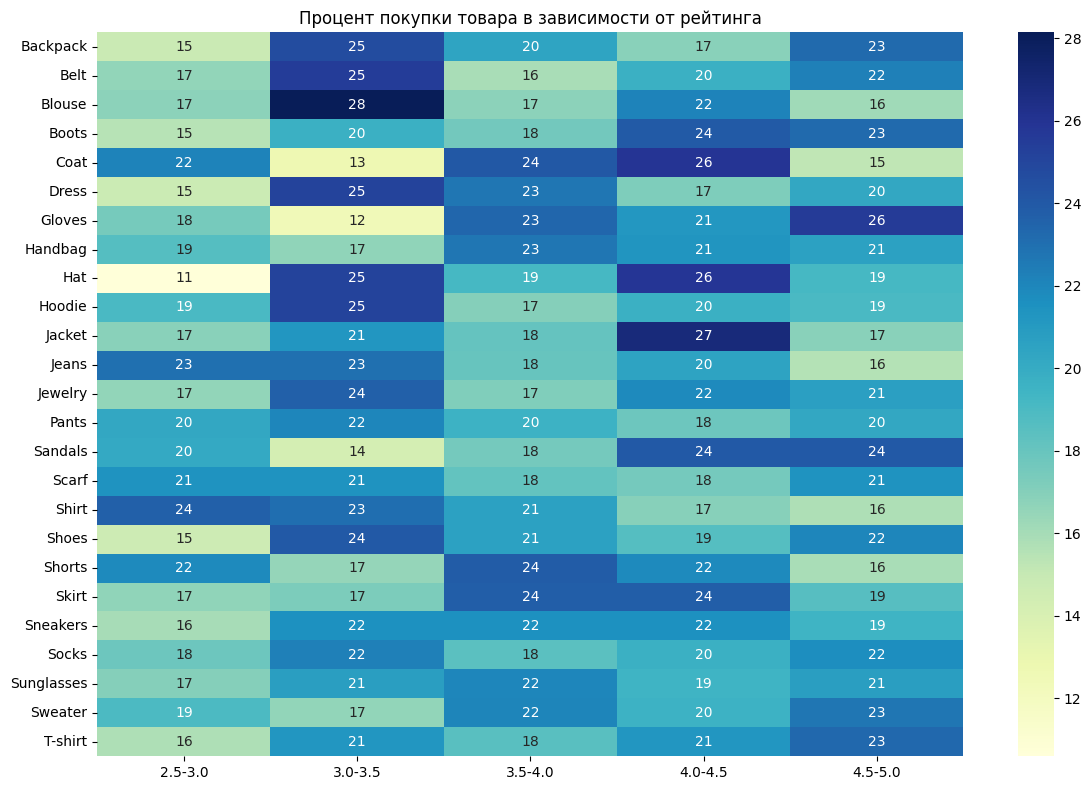

In [184]:
# Разделеним рейтинг на промежутки
bins = [ 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = [ '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']

# Создим колонку group_of_rating, которая будет хранить группы по рейтингу
df['group_of_rating'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=False)

# Считаем количество покупок для каждого сочетания товара и группы рейтинга
purchase_count = df.groupby(['Item Purchased', 'group_of_rating']).size().unstack(fill_value=0)

# Для каждого товара считаем процентное соотношение
purchase_perc = purchase_count.div(purchase_count.sum(axis=1), axis=0) * 100

# Тепловая карты
plt.figure(figsize=(12,8))
sns.heatmap(purchase_perc, annot=True, cmap='YlGnBu')
plt.title('Процент покупки товара в зависимости от рейтинга')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Нет явной корреляции между количеством покупок и рейтингом товара. Возможно, при покупке товаров люди обращают внимания не только на рейтинг товара, но еще и на другие факторы

**Гипотеза 4 - Сумма покупки не зависит от метода оплаты**

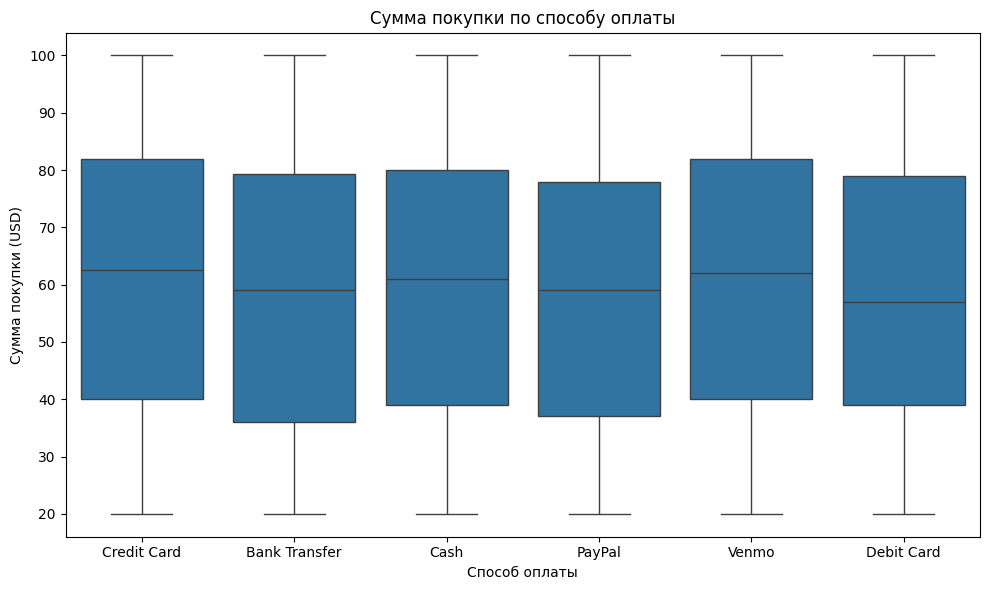

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df)
plt.title('Сумма покупки по способу оплаты')
plt.xlabel('Способ оплаты')
plt.ylabel('Сумма покупки (USD)')
plt.tight_layout()
plt.show()


Как видно из графика, нет зависимости между суммой покупки и способом оплаты

**Гипотеза 5 - Распределение суммы покупок имеет нормальное распределение**

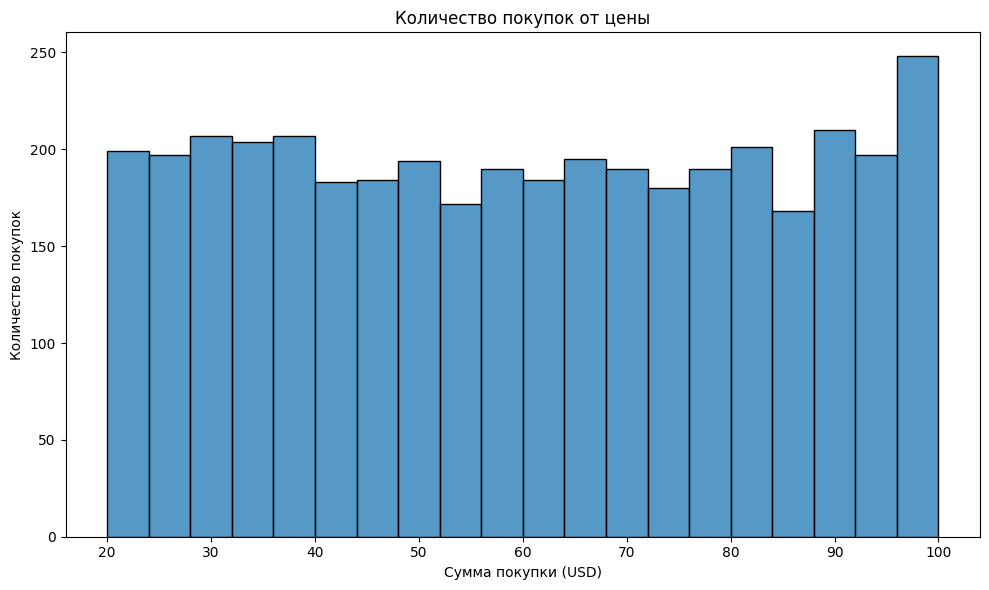

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=20)
plt.title('Количество покупок от цены')
plt.xlabel('Сумма покупки (USD)')
plt.ylabel('Количество покупок')
plt.tight_layout()
plt.show()



Как видно из графика, сумма покупок имеет распределение, отличное от нормального.

### <h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

In [187]:
# Самый популярный товар
df['Item Purchased'].value_counts().head()

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


Чаще всего покупали блузки, украшения и брюки

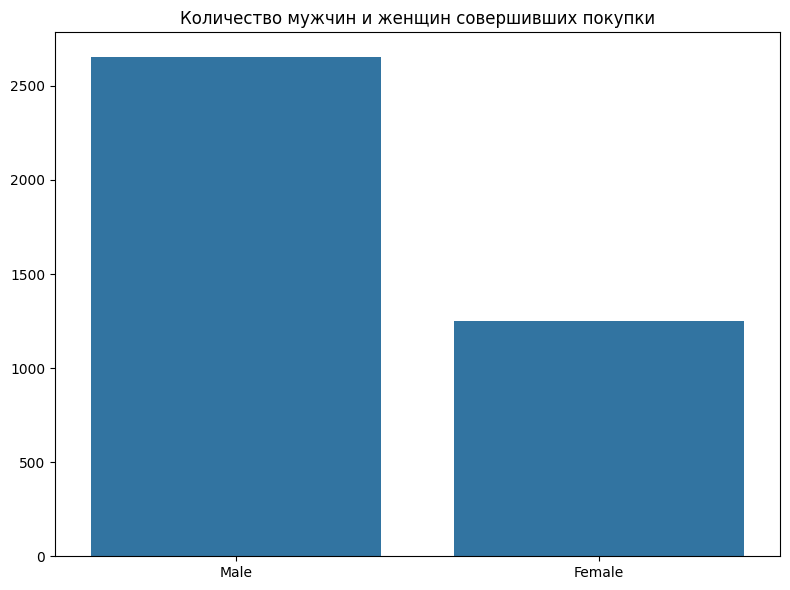

In [188]:
# Распределение покупателей по полу
# Считаем количество покупателей в зависимости от пола
gender_count = df['Gender'].value_counts()

# Строим диаграмму
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Количество мужчин и женщин совершивших покупки')
plt.xlabel('')
plt.tight_layout()
plt.show()


Мужчин практически в два раза больше чем женщин

<ipython-input-189-433163e96373>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchases_by_age = df.groupby('group_of_age')['Purchase Amount (USD)'].count()
<ipython-input-189-433163e96373>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_by_age = df.groupby('group_of_age')['Purchase Amount (USD)'].sum()
<ipython-input-189-433163e96373>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_age = df.gro

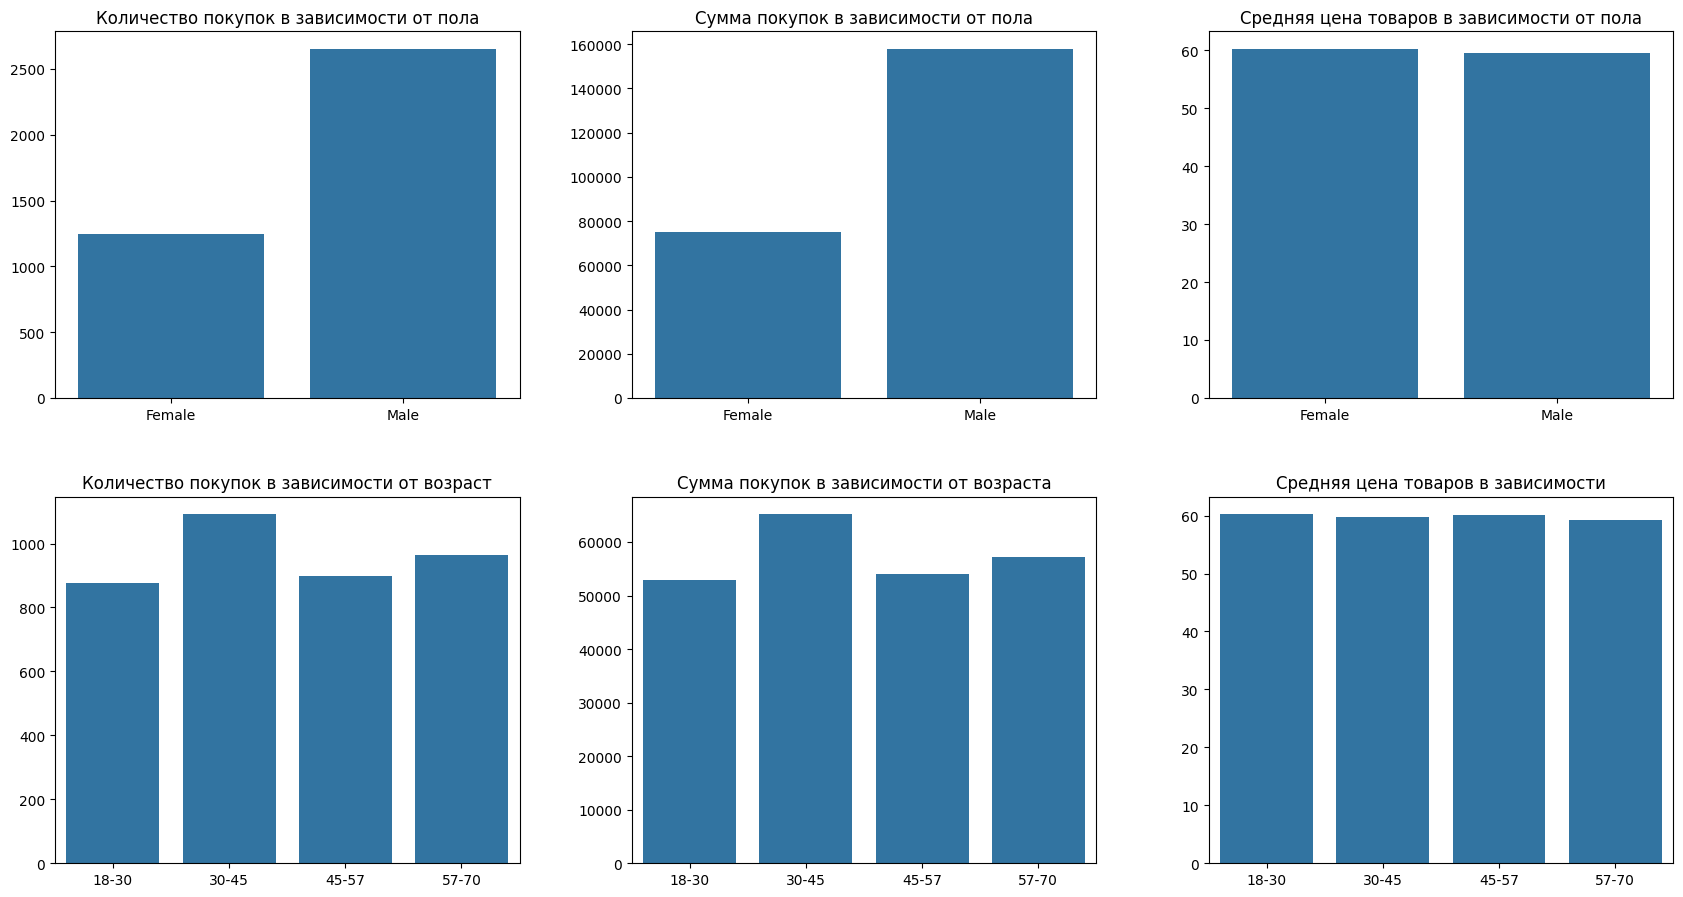

In [189]:
# Количество покупок по полу
purchases_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].count()

# Сумма покупок по полу
sum_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Средняя цена по полу
avg_price_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()

# Количество покупок по возрасту
purchases_by_age = df.groupby('group_of_age')['Purchase Amount (USD)'].count()

# Сумма покупок по возрасту
sum_by_age = df.groupby('group_of_age')['Purchase Amount (USD)'].sum()

# Средняя цена по возрасту
avg_price_by_age = df.groupby('group_of_age')['Purchase Amount (USD)'].mean()

# Графики
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 строки, 3 столбца
fig.tight_layout(pad=5.0)

# График для количества покупок по полу
sns.barplot(x=purchases_by_gender.index, y=purchases_by_gender.values, ax=axes[0, 0])
axes[0, 0].set_title('Количество покупок в зависимости от пола')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# График для суммы покупок по полу
sns.barplot(x=sum_by_gender.index, y=sum_by_gender.values, ax=axes[0, 1])
axes[0, 1].set_title('Сумма покупок в зависимости от пола')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# График для средней цены по полу
sns.barplot(x=avg_price_by_gender.index, y=avg_price_by_gender.values, ax=axes[0, 2])
axes[0, 2].set_title('Средняя цена товаров в зависимости от пола')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')

# График для количества покупок по возрасту
sns.barplot(x=purchases_by_age.index, y=purchases_by_age.values, ax=axes[1, 0])
axes[1, 0].set_title('Количество покупок в зависимости от возраст')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# График для суммы покупок по возрасту
sns.barplot(x=sum_by_age.index, y=sum_by_age.values, ax=axes[1, 1])
axes[1, 1].set_title('Сумма покупок в зависимости от возраста')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# График для средней цены по возрасту
sns.barplot(x=avg_price_by_age.index, y=avg_price_by_age.values, ax=axes[1, 2])
axes[1, 2].set_title('Средняя цена товаров в зависимости')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')

plt.show()

В этом магазине количество мужчин,совершивших покупку больше, чем количество женщин. Соответственно и сумма покупок у мужчин тоже выше, так как их количество больше. Средняя цена товаров примерно одинакова.

Чаще всего покупают люди в промежутке от 30-45 лет. Люди этого возраста наиболее платежеспособны и это логично, что большинство покупок приходится на них.Соответственно и сумма покупок тоже выше, так как их количество больше. Средняя цена товаров не зависит от возраста покупателей

Хи-квадрат: 64.6506366841786
p-value: 0.718551112120402
Нет статистически значимой зависимости между цветом одежды и сезоном


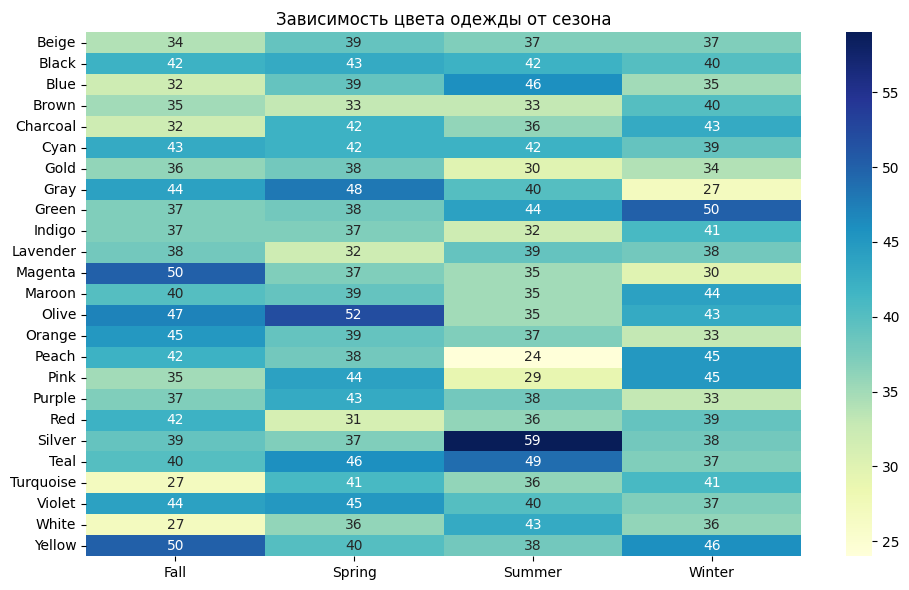

In [190]:
# Определите, есть ли зависимость между цветом одежды и сезоном
# Создаем таблицу сопряженности
cross_table = pd.crosstab(df['Color'], df['Season'])

# Применяем тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(cross_table)

# Результаты теста
print(f'Хи-квадрат: {chi2}')
print(f'p-value: {p}')

# Установим уровень значимости
alpha = 0.05
if p < alpha:
    print('Есть статистически значимая зависимость между цветом одежды и сезоном')
else:
    print('Нет статистически значимой зависимости между цветом одежды и сезоном')

# Таблица сопряженности
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='YlGnBu')
plt.title('Зависимость цвета одежды от сезона')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


Для большинства цветов нет зависимости от сезона. Можно заметить, что серебрянные цвета люди предпочитают носить в основном летом, пурпурный и желтый - осенью, оливковый и серый - весной и зеленый зимой

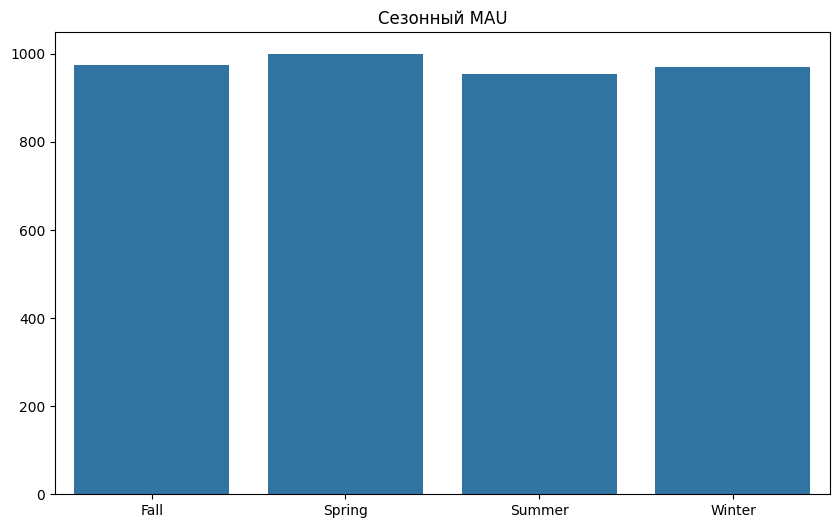

In [191]:
# Подсчитываем MAU за каждый сезон
season_mau = df.groupby('Season')['Customer ID'].nunique()

# График MAU
plt.figure(figsize=(10, 6))
sns.barplot(x=season_mau.index, y=season_mau.values)
plt.title('Сезонный MAU')
plt.xlabel('')
plt.show()

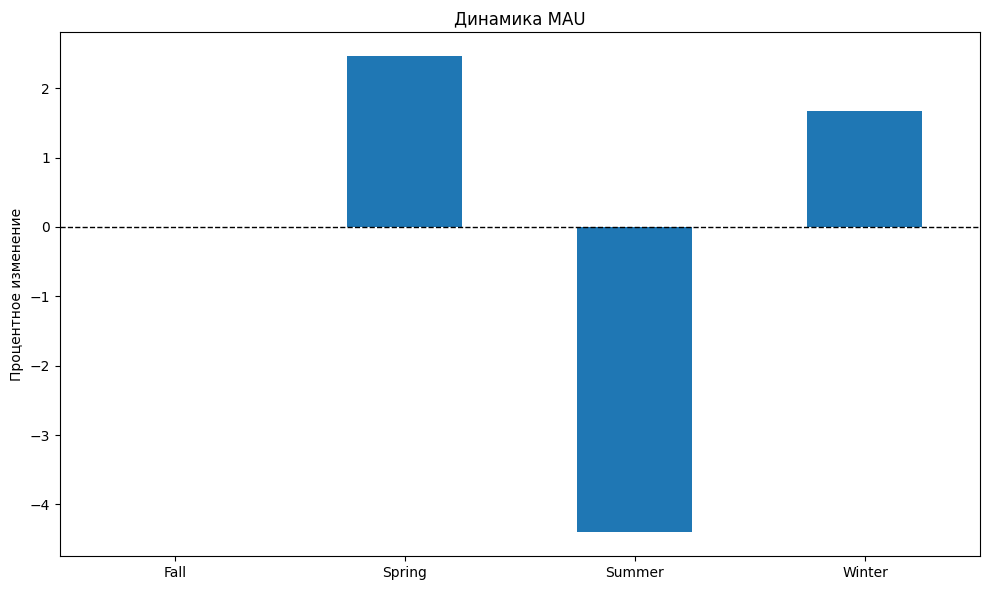

In [192]:
# Рассчитаем процентное изменение
season_mau_list = [0]  # Первый сезон рассматриваем как нулевой уровень
for i in range(1, len(seasonal_mau)):
    prev = seasonal_mau.iloc[i - 1]  # MAU предыдущего сезона
    curr = seasonal_mau.iloc[i]      # MAU текущего сезона
    change = ((curr - prev) / prev) * 100
    season_mau_list.append(change)

# Преобразуем в Series
season_mau_list = pd.Series(season_mau_list, index=seasonal_mau.index)

# График динамики MAU
plt.figure(figsize=(10, 6))
season_mau_list.plot(kind='bar')
plt.title('Динамика MAU')
plt.xlabel('')
plt.ylabel('Процентное изменение')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Линия нулевого уровня
plt.tight_layout()
plt.show()


Отличие в количестве новых пользователей от сезона изменяется незначительно. По графику динамики изменений MAU видим, что весной и зимой наблюдается небольшой прирост(2.5% и 1.5%), а летом - уменьшение новых покупателей на 4 %

In [193]:
# Преобразуем в список
items = df['Item Purchased'].tolist()

# Собираем все буквы из названий товаров
all_letters = ''.join(items)

# Создаем словарь для подсчета частоты букв
letter_count = {}

# Подсчитываем количество каждой буквы
for a in all_letters:
    a = a.lower()  # Преобразуем к нижнему регистру
    if a in letter_count:  # Проверяем, есть ли буква в словаре
        letter_count[a] += 1  # Если есть, увеличиваем счётчик
    else:
        letter_count[a] = 1  # Если нет, добавляем в словарь с начальным значением 1

# Находим самую популярную букву и её количество
most_popular_letter = max(letter_count, key=lambda x: letter_count[x])
count_of_letter = letter_count[most_popular_letter]

print(f'Самая популярная буква в названии товаров - "{most_popular_letter}" и количеством использования - {count_of_letter}')


Самая популярная буква в названии товаров - "s" и количеством использования - 4063


## <h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [122]:
data=pd.read_csv('/content/drinks.csv')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [102]:
data.drop_duplicates()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [99]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [129]:
# посмотрим где больше всего пьют чистого спирта и выведем топ 10 стран
top_pure_alcohol=data.sort_values(by='total_litres_of_pure_alcohol',
                                  ascending=False)[['country', 'total_litres_of_pure_alcohol']].head(10)
top_pure_alcohol

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
81,Ireland,11.4
155,Slovakia,11.4
99,Luxembourg,11.4


In [128]:
# посмотрим где больше всего пьют пива и выведем топ 10 стран
top_beer=data.sort_values(by='beer_servings', ascending=False)[['country', 'beer_servings']].head(10)
top_beer

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


In [131]:
# посмотрим где больше всего спиртные порции и выведем топ 10 стран
top_spirit=data.sort_values(by='spirit_servings', ascending=False)[['country', 'spirit_servings']].head(10)
top_spirit

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315
72,Guyana,302
155,Slovakia,293
50,Dominica,286
169,Thailand,258
40,Cook Islands,254


In [147]:
# посмотрим где больше всего пьют вина и выведем топ 10 стран
top_wine=data.sort_values(by='wine_servings', ascending=False)[['country','wine_servings']].head(10)
top_wine

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


In [149]:
# Находим страны, которые попали хотя бы в два рейтинга из четырех выше
top_beer=top_beer['country']
top_spirit=top_spirit['country']
top_wine=top_wine['country']
top_pure_alcohol=top_pure_alcohol['country']
top_country = (
    (set(top_beer) & set(top_spirit)) |
    (set(top_beer) & set(top_wine)) |
    (set(top_beer) & set(top_pure_alcohol)) |
    (set(top_spirit) & set(top_wine)) |
    (set(top_spirit) & set(top_pure_alcohol)) |
    (set(top_wine) & set(top_pure_alcohol))
)

print(top_country)

{'France', 'Ireland', 'Belarus', 'Slovakia', 'Luxembourg', 'Andorra', 'Grenada', 'Czech Republic', 'Lithuania', 'Russian Federation'}


Самыми пьющими странами можно назвать:'France', 'Ireland', 'Belarus', 'Slovakia', 'Luxembourg', 'Andorra', 'Grenada', 'Czech Republic', 'Lithuania', 'Russian Federation'. Они содержатся как минимум в двух рейтингах , которые показывают топ 10 стран с самым высоким потреблением пива, вина, спиртных напитков и чистого спирта

## <h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [162]:
data2 = pd.read_csv('/content/tarantino.csv')
data2

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [165]:
data2 = data2.drop_duplicates()

In [166]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1840 non-null   object 
 1   type        1840 non-null   object 
 2   word        1685 non-null   object 
 3   minutes_in  1840 non-null   float64
dtypes: float64(1), object(3)
memory usage: 71.9+ KB


In [167]:
data2.describe(include='all')

,movie,type,word,minutes_in
count,1840,1840,1685,1840.000000
unique,7,2,60,NaN
top,Pulp Fiction,word,fucking,NaN
freq,469,1685,404,NaN
mean,NaN,NaN,NaN,71.481109
std,NaN,NaN,NaN,44.872775
min,NaN,NaN,NaN,0.400000
25%,NaN,NaN,NaN,29.910000
50%,NaN,NaN,NaN,70.225000
75%,NaN,NaN,NaN,112.765000


In [168]:
data2['type'].value_counts()

,count
type,
word,1685
death,155


In [174]:
data2[data2.isnull().any(axis=1)]

,movie,type,word,minutes_in
268,Reservoir Dogs,death,NaN,59.93
385,Reservoir Dogs,death,NaN,85.58
387,Reservoir Dogs,death,NaN,85.81
389,Reservoir Dogs,death,NaN,86.55
395,Reservoir Dogs,death,NaN,88.06
...,...,...,...,...
1521,Django Unchained,death,NaN,160.45
1625,Jackie Brown,death,NaN,23.08
1807,Jackie Brown,death,NaN,113.28
1840,Jackie Brown,death,NaN,125.43


Пропущенные значения в столбце слово есть только в тех строчках, где мы описываем смерть персонажей. Значит ничего удалять не нужно

In [204]:
# Частота употребления проклятий
# Создаем список для проклятий
words = []

# Создадим словарь для подсчета частоты употребления проклятий
words_dict = {}

# Проходим по всем строкам, проверяем слово и увеличиваем счетчик
for word in data2['word']:
    if word in words_dict:
        words_dict[word] += 1
    else:
        words_dict[word] = 1

# Выводим данные из словаря
for word, count in words_dict.items():
    print(f'{word}: {count} раз')



dick: 8 раз
dicks: 5 раз
fucked: 24 раз
fucking: 404 раз
bullshit: 15 раз
fuck: 211 раз
shit: 219 раз
motherfucker: 69 раз
pussy: 11 раз
fucks: 3 раз
hell: 44 раз
jap: 1 раз
bastard: 10 раз
goddamn: 113 раз
motherfuckers: 15 раз
asshole: 10 раз
ass: 140 раз
assholes: 5 раз
n-word : 177 раз
asses: 4 раз
bitch: 63 раз
fuckup: 1 раз
fucker: 8 раз
shitty: 4 раз
asshead: 1 раз
damn: 37 раз
nan: 155 раз
damned: 3 раз
bitches: 9 раз
wetback: 2 раз
faggot: 1 раз
cocksucker: 2 раз
gook: 1 раз
fuckers: 1 раз
gooks: 2 раз
motherfucking: 27 раз
dickless: 1 раз
chickenshit: 1 раз
slope: 1 раз
fuckhead: 1 раз
merde: 1 раз
shithead: 3 раз
cunt: 2 раз
cunts: 1 раз
fuckface: 1 раз
cockblockery: 1 раз
japs: 2 раз
jew (verb): 1 раз
bastards: 1 раз
horeshit: 1 раз
shitless: 1 раз
shitting: 1 раз
negro : 5 раз
squaw: 1 раз
slut: 1 раз
goddamned: 1 раз
jackass: 1 раз
horseshit: 2 раз
shittiest: 1 раз
shitload: 2 раз
dumbass: 1 раз


In [211]:
# Число проклятий, летальных исходов и их соотношение по фильмам
# Подсчитаем число проклятий и количество смертей в датасете
word_data2 = data2[data2['type'] == 'word']
death_data2 = data2[data2['type'] == 'death']
word_count = word_data2.groupby('movie').size()
death_count = death_data2.groupby('movie').size()

# Соединяем в датафрейм
result = pd.DataFrame({
    'word_count': word_count,
    'death_count': death_count
})

# Рассчитаем соотношения
result['ratio'] = (result['word_count'] / result['death_count']).round(2)

print(result)


                     word_count  death_count  ratio
movie                                              
Django Unchained            260           41   6.34
Inglorious Basterds          58           36   1.61
Jackie Brown                365            4  91.25
Kill Bill: Vol. 1            57           57   1.00
Kill Bill: Vol. 2            69            3  23.00
Pulp Fiction                462            7  66.00
Reservoir Dogs              414            7  59.14


Больше всего проклятий в Jackie Brown, Pulp Fiction, Reservoir Dogs. Больше всего смертей в Django Unchained, Inglorious Basterds, Kill Bill: Vol. 1. Самое большое соотношение проклятий к смерти в фильме Jackie Brown, а самое маленькое - в фильме Kill Bill: Vol. 1 (одинаковое количество смертей и проклятий)

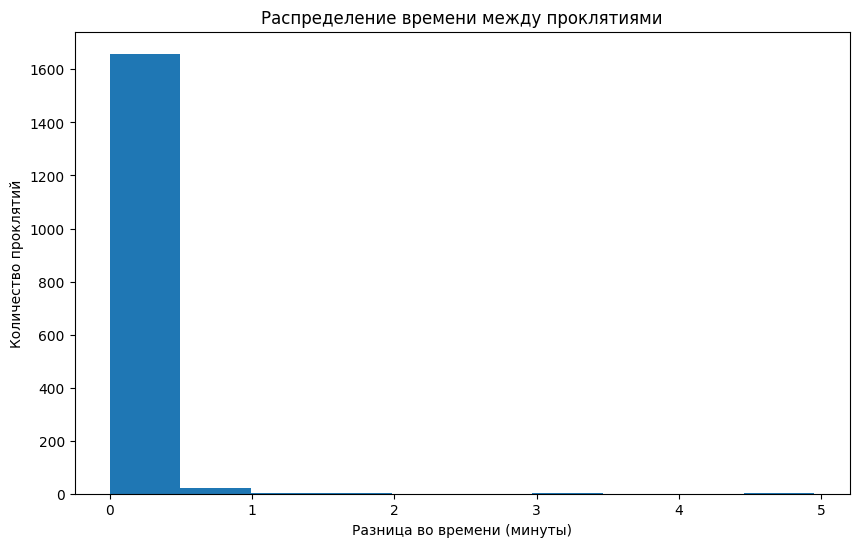

In [216]:
# Распределение времени между проклятиями
# Отсортируем проклятия по времени произошения
word_data2 = word_data2.sort_values(by='minutes_in')

# Рассчитаем разницу во времени между проклятиями
word_data2['time_diff'] = curse_df['minutes_in'].diff()

# Строим график
plt.figure(figsize=(10, 6))
plt.hist(word_data2['time_diff'], bins=10)
plt.title('Распределение времени между проклятиями')
plt.xlabel('Разница во времени (минуты)')
plt.ylabel('Количество проклятий')
plt.show()

Большинство проклятий произнесено с разницей не более половины минуты